# US Visa Prediction Project

### Life Cycle of a Machine Learning Project

- **1. Understanding the Problem Statement**
- **2. Data Collection**
- **3. Exploratory Data Analysis**
- **4. Data Cleaning**
- **5. Data Pre-Processing**
- **6. Model Training**
- **7. Choose Best Model**

# About

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts in the workplace and maintains requirements when hiring foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

## 1) Problem Statement

The OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications. Last year, the number of applications was substantial, prompting the OFLC to seek machine learning models to shortlist visa applicants based on historical data.

In this project, we will build a classification model to determine whether a visa will be approved or not based on the given dataset. This model can recommend suitable profiles for applicants whose visas should be certified or denied based on specific criteria influencing the decision.

## 2) Data Collection

The dataset is provided by the Office of Foreign Labor Certification (OFLC) and consists of 25,480 rows and 12 columns. You can access it [here](https://www.kaggle.com/datasets/moro23/easyvisa-dataset).




##### 2.1 Import Data and required packages
<text>Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.</text>

In [25]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

Import the csv data as pandas dataframe

In [26]:
df = pd.read_csv('visadataset.csv')


Show top 5 records

In [27]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


Shape of the dataset

In [28]:
df.shape

(25480, 12)

Check datatype in the data

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


### 3. Exploring Data

In [30]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']

We have 9 categorical features : ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [31]:
#categorical_features.remove('case_id')

for col in categorical_features:
    print(df[col].value_counts(normalize = True)*100)
    print('----------------------------------------------')

case_id
EZYV01       0.003925
EZYV16995    0.003925
EZYV16993    0.003925
EZYV16992    0.003925
EZYV16991    0.003925
               ...   
EZYV8492     0.003925
EZYV8491     0.003925
EZYV8490     0.003925
EZYV8489     0.003925
EZYV25480    0.003925
Name: proportion, Length: 25480, dtype: float64
----------------------------------------------
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
----------------------------------------------
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
----------------------------------------------
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
----------------------------------------------
requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dt

#### Insight 

<li><b>Case_id</b>: Have unique values for each column which can be dropped as it is of no importance</li>
<li><b>continent</b> : is highly biased towards Asia with majority of 66%</li>
<li><b>unit_of_wage</b> : seems to be an important column as most of them are yearly contracts


### Univariate Analysis
<p>The term univariate analysis refers to the analysis of one variable prefix "uni" means "one" . The purpose of univariate analysis is to understand the distribution of values for a single variable</p>

Other types of Analysis are :
<li><b>Bivariate Analysis</b> : The analysis of two variables</li>
<li><b>Multivariate Analysis</b>:The analysis of two or more variable</li>

### Numerical Features

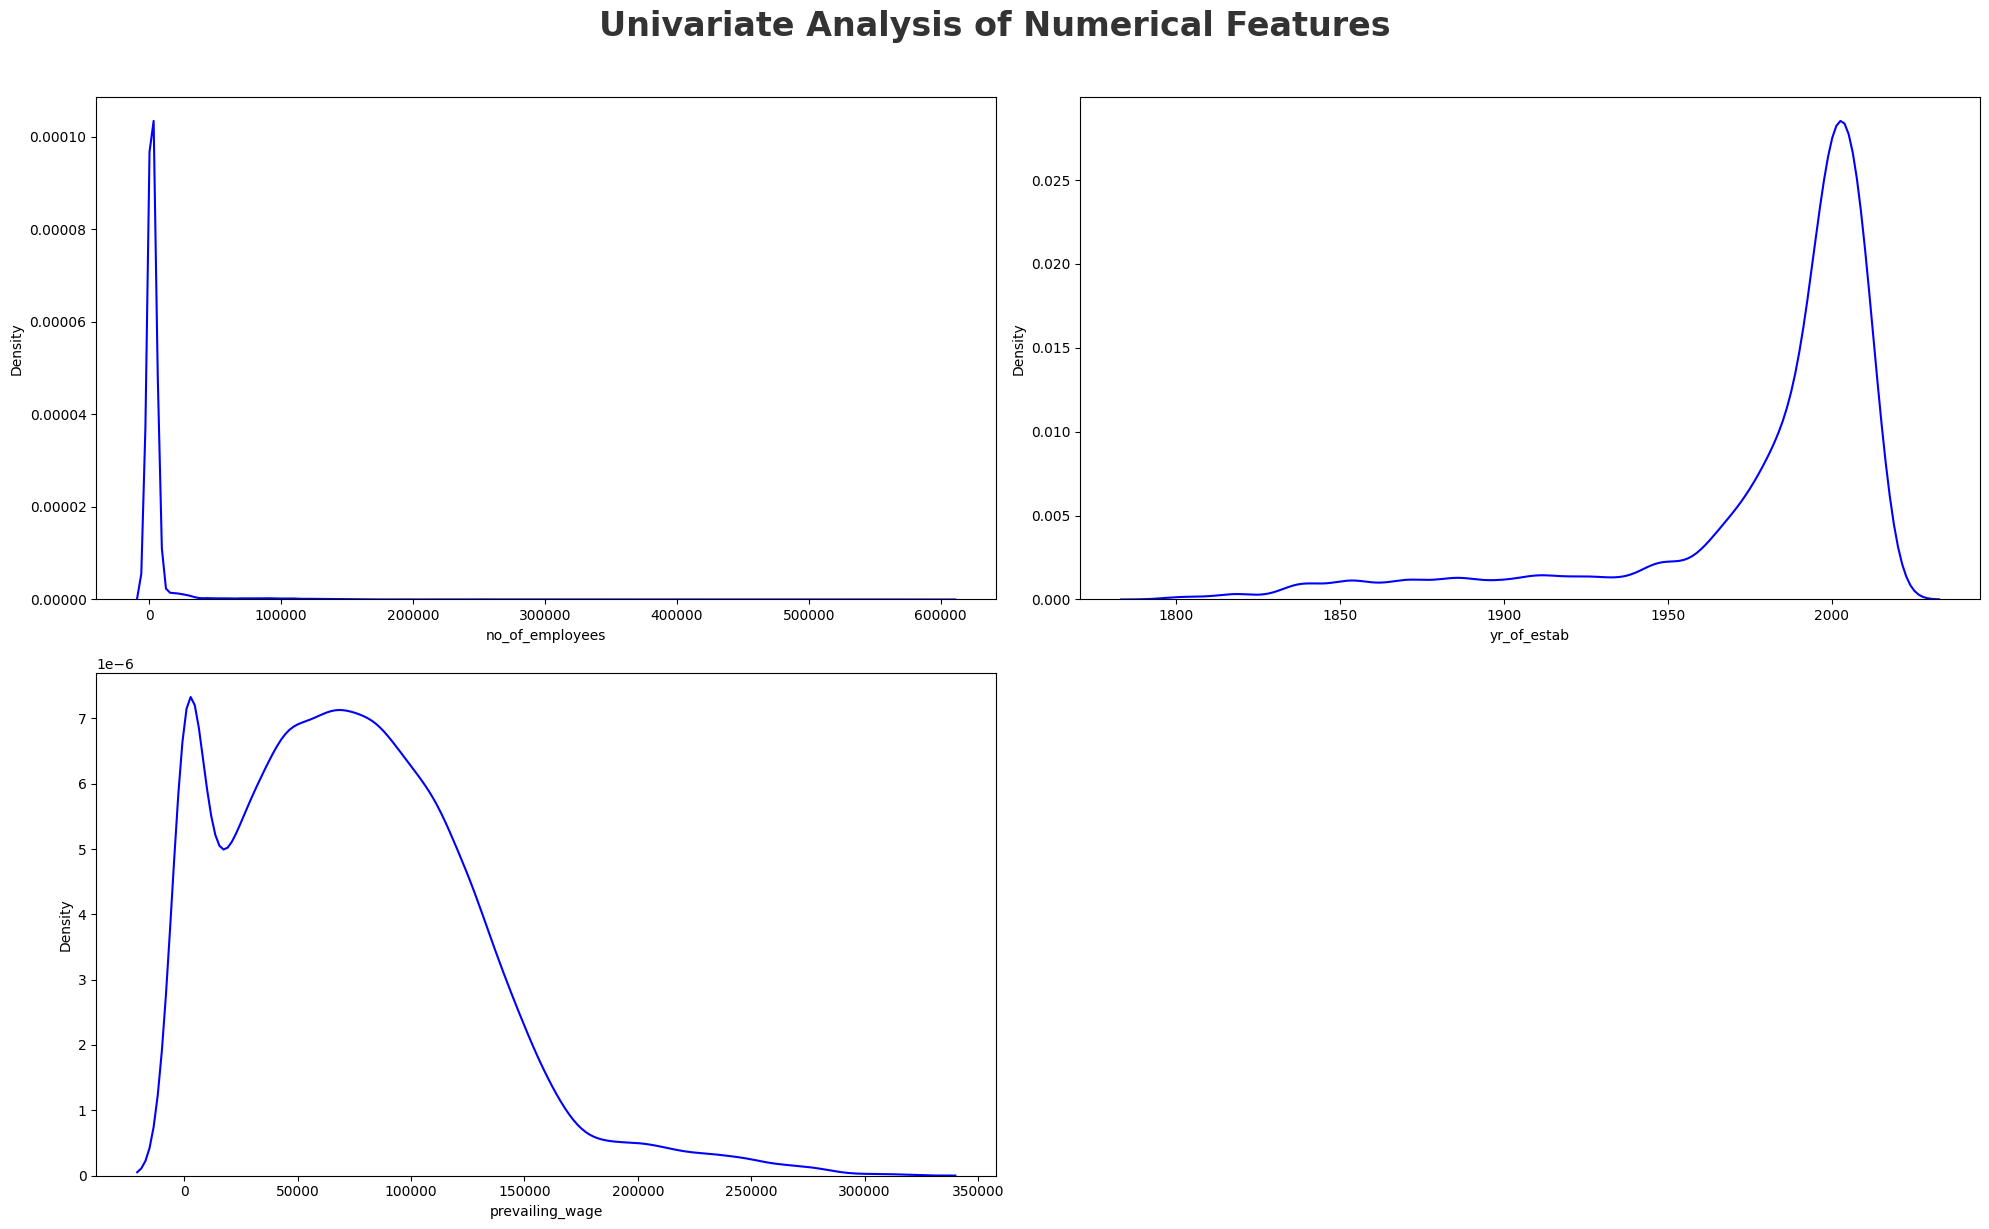

<Figure size 640x480 with 0 Axes>

In [32]:
plt.figure(figsize=(20, 12))  
plt.suptitle("Univariate Analysis of Numerical Features", fontsize=24, fontweight='bold', alpha=0.8, y=1.02)

for i in range(len(numeric_features)):
    plt.subplot(2, 2, i + 1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.ylabel('Density')  

plt.tight_layout(rect=[0, 0, 1, 1])  
plt.show()
#save plot
plt.savefig('./images/Univatiate_Cat.png')

##### Insight 
<li>year of establishment is a discrete feature </li>
<li>number of employee seems to be highly skewed but it maybe because of outliers</li>
<li>prevailing wage is a rightly skewed feature

### Categorical Features

In [33]:
categorical_features

['case_id',
 'continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position',
 'case_status']

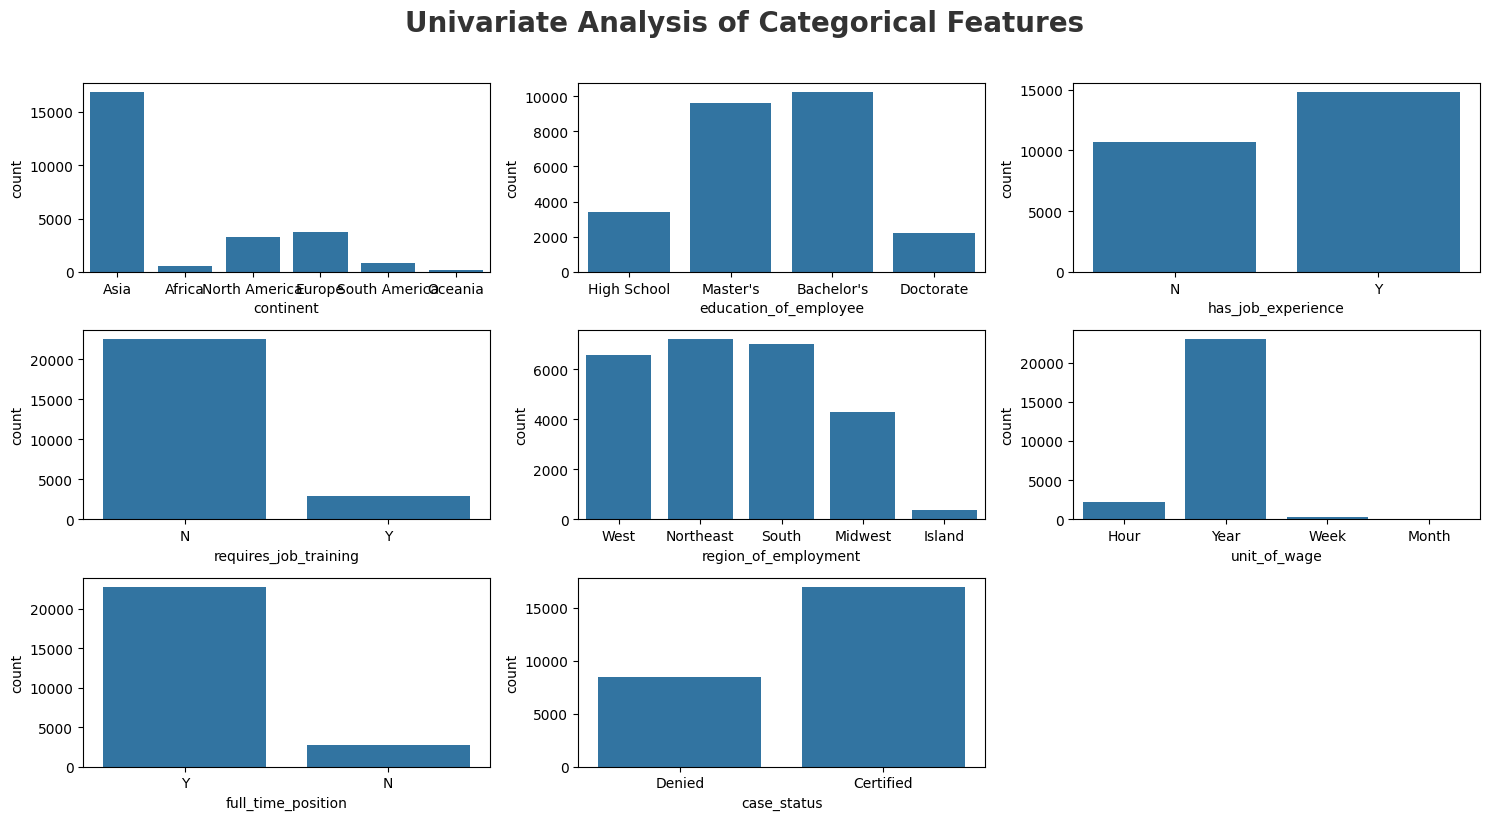

In [34]:
categorical_features.remove('case_id')
plt.figure(figsize=(15,8))
plt.suptitle("Univariate Analysis of Categorical Features", fontsize = 20 , fontweight = 'bold' , alpha = 0.8, y =1.02)
for i in range(0,len(categorical_features)):
    plt.subplot(3,3,(i+1))
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout(rect=[0, 0, 1, 1])

plt.savefig('./images/univariat_categorical.png')

#### Insight
<li> requires_job_training , unit_of_wage , full_time_position and continents columns have single category dominating </li>
<li>Rest of the columns are balanced</li>

## Multivariate Analysis
<li>Multivariate Analysis is analysis of more than one variable </li>

In [35]:
discrete_features = [features for features in numeric_features if len(df[features].unique()) <25]
continuous_features = [features for features in numeric_features if len(df[features].unique()) >25]

print("we have {} discrete features: {}".format(len(discrete_features) , discrete_features))
print("we have {} continuous features: {}".format(len(continuous_features), continuous_features))

we have 0 discrete features: []
we have 3 continuous features: ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


#### Checking Multicollinearity in Numerical Features


In [36]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [37]:
df[numeric_features].corr()

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


##### Insight 
There is no mulicollinearity between any variable


#### Check Multicollinearity between categorical features
<li>A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test</li>

<li>A chi-square statistic is one way to show a relationship between two categorical variables.</li>

<li>Here we test correlation of Categorical columns with Target column i.e case_status</li>

Null Hypothesis (
): The Feature is independent of target column (No-Correlation)

Alternative Hypothesis (
): The Feature and Target column are not independent (Correalted)


In [38]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['case_status'],df[feature]))[1] < 0.05 :
        chi2_test.append('Reject Null Hypothesis')
    else :
        chi2_test.append('Failed to reject null hypothesis')
result = pd.DataFrame(data = [categorical_features, chi2_test]).T
result.columns = ['Column','Hypothesis Result']
result

,Column,Hypothesis Result
0,continent,Reject Null Hypothesis
1,education_of_employee,Reject Null Hypothesis
2,has_job_experience,Reject Null Hypothesis
3,requires_job_training,Failed to reject null hypothesis
4,region_of_employment,Reject Null Hypothesis
5,unit_of_wage,Reject Null Hypothesis
6,full_time_position,Reject Null Hypothesis
7,case_status,Reject Null Hypothesis


##### Insight
requires_job_training failed to reject null hypothesis that means it doesn't correlate with target column

#### Checking Null Values

In [39]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [40]:
continuous_features 

['no_of_employees', 'yr_of_estab', 'prevailing_wage']

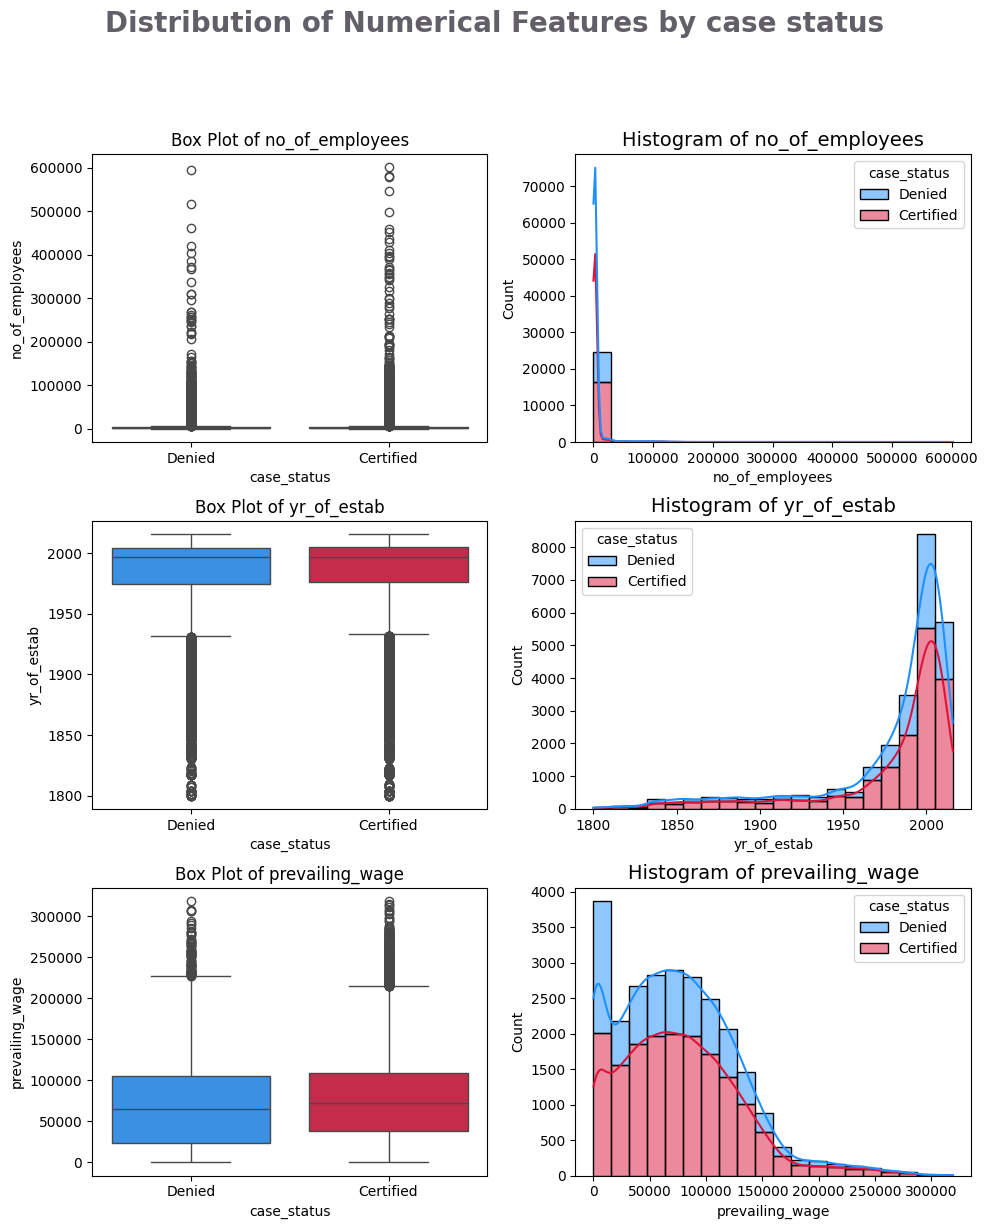

In [41]:
clr1 = ['#1E90FF','#DC143C']
fig,ax = plt.subplots(3,2,figsize = (10,12))
fig.suptitle("Distribution of Numerical Features by case status" , color = '#3C3744',fontsize = 20 , fontweight ='bold',ha = 'center', alpha = 0.8 , y = 1.02)

for i , col in enumerate(continuous_features):
    sns.boxplot(data = df, x = 'case_status' , y = col , palette = clr1 ,ax = ax[i,0])
    ax[i,0].set_title(f"Box Plot of {col}" , fontsize = 12) 
    sns.histplot(data = df , x = col , hue = 'case_status', bins = 20 , kde = True , multiple = 'stack' ,palette = clr1 ,ax = ax[i,1])
    ax[i,1].set_title(f"Histogram of {col}",fontsize = 14 )
fig.tight_layout(rect = [0,0,1,1])
fig.subplots_adjust(top = 0.90)

#### Initial Analysis Report
<li>No. of employees has many outliers which can be handles in feature engineering and number of employees is rightly skewed</li>
<li>yr_of_estab is left skewed and some outlier below the lower bound of Box Plot</li>
<li>prevailing_wage is righlty skewed and some outlier above the upper bound of box plot</li>
<li>There are no missing values in dataset</li>
<li>The case_id column can be deleted because each row has a unique values</li>
<li>The case_status column is target to predict</li>
<li>In the categorical column , features can be made binary numerical in feature encoding</li>


### 4. Visuialization
#### 4.1 Visualize the target features

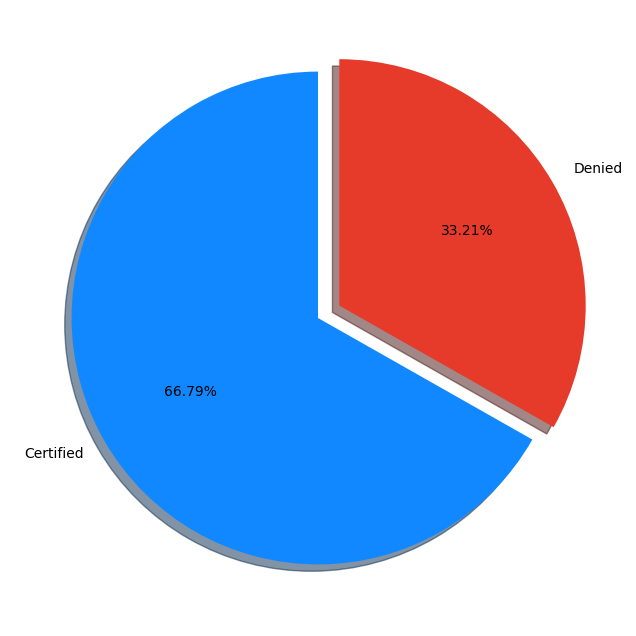

In [42]:
percentage = df.case_status.value_counts(normalize=True)*100
labels = ['Certified','Denied']

fig,ax = plt.subplots(figsize = (15,8))
explode = (0,0.1)
colors = ['#1188ff','#e63a2a']
ax.pie(percentage,labels = labels , startangle= 90 , autopct='%1.2f%%',explode = explode , shadow = True , colors = colors)
plt.show()

<li>from the chart it is seen that the target variable is imbalanced.</li>
<br>
<b>What is Imbalanced Data ? </b>
<p>Imbalanced data are types of data  where the target class has an uneven distribution of observations. i.e here certified value has more count than the certified values of dataset


#### 4.2 Does applicants continent has any impact on Visa status ?

In [43]:
# group data by continent and their case status
df.groupby('continent')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
continent     case_status            
Africa        Certified     72.050817
              Denied        27.949183
Asia          Certified     65.310480
              Denied        34.689520
Europe        Certified     79.233655
              Denied        20.766345
North America Certified     61.877278
              Denied        38.122722
Oceania       Certified     63.541667
              Denied        36.458333
South America Certified     57.863850
              Denied        42.136150

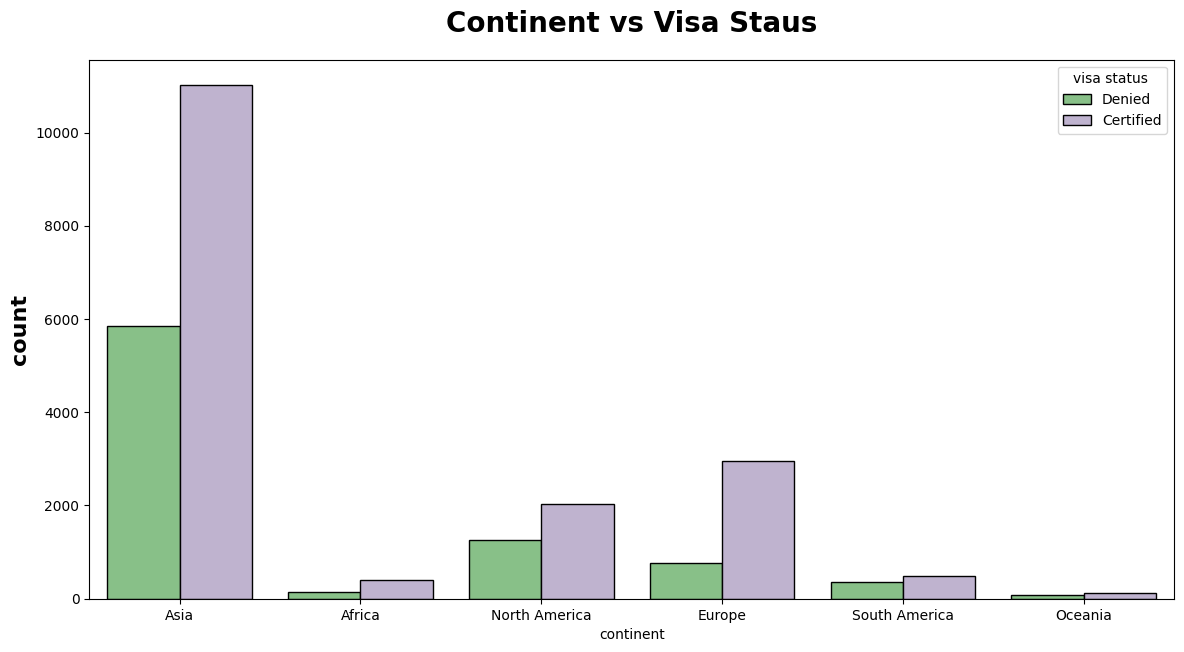

In [44]:
plt.subplots(figsize = (14,7))
sns.countplot(x = "continent" , hue = "case_status" , data = df , ec = "black" , palette="Accent")
plt.title("Continent vs Visa Staus" , weight = "bold", fontsize = 20 , pad = 20)
plt.ylabel("count", weight = "bold" , fontsize = 16 )
plt.legend(title = 'visa status ' ,fancybox = True)
plt.show()

In [47]:
df2 = df.copy()


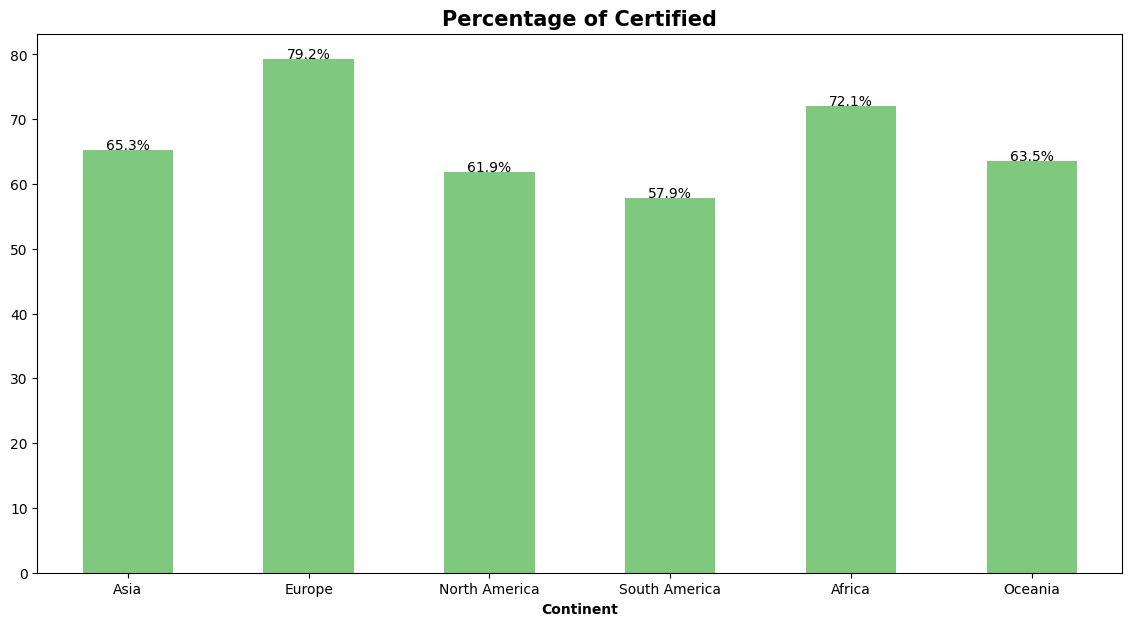

In [48]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['continent'].value_counts()/df2['continent'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['continent'].value_counts()/df2['continent'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('Continent' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()


#### Report 
<li>As per the Chart Asia applicants applied more than other continents.</li>
<li>43% of Certified applications are from Asia.</li>
<li>This is followed by Europe with 11% of Certified applications.</li>
<li>Highest chance of getting certified if you are from Europe and followed by Africa</li>

#### 4.3 Does applicant education has any impact on visa status?

In [52]:
#group data by education and their current count of case status
df.groupby('education_of_employee')['case_status'].value_counts(normalize =True).to_frame()*100

proportion
education_of_employee case_status            
Bachelor's            Certified     62.214188
                      Denied        37.785812
Doctorate             Certified     87.226277
                      Denied        12.773723
High School           Denied        65.964912
                      Certified     34.035088
Master's              Certified     78.627777
                      Denied        21.372223

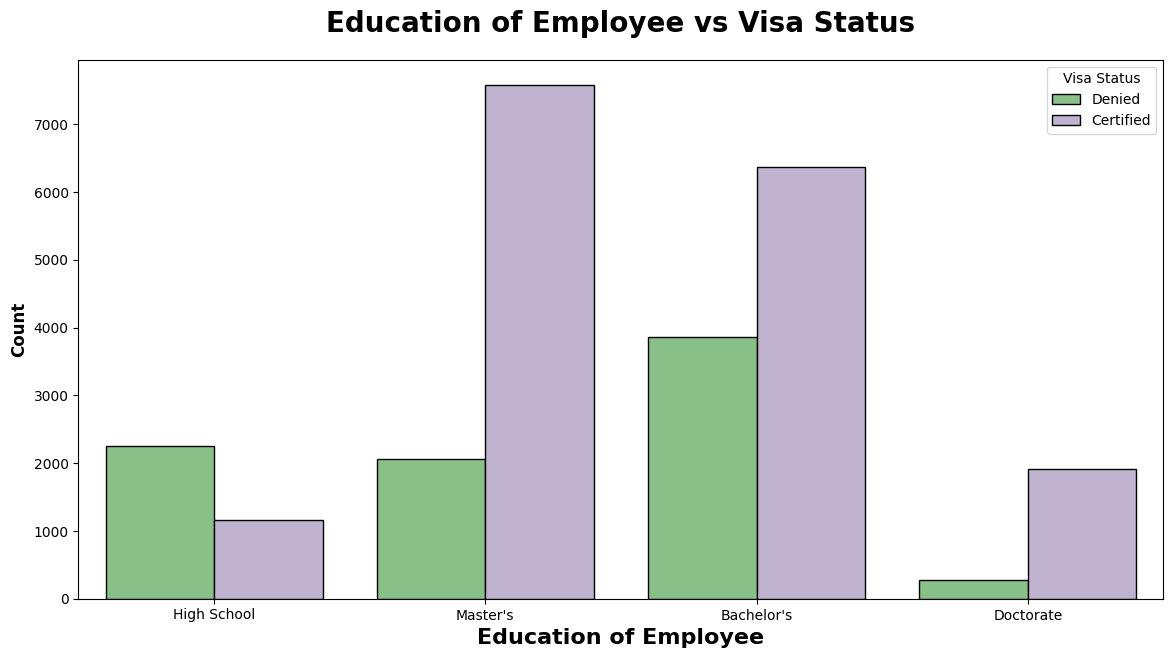

In [57]:
plt.subplots(figsize = (14,7))
sns.countplot(x = 'education_of_employee' , hue = 'case_status',data = df ,ec = 'black', palette='Accent')
plt.title("Education of Employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Education of Employee", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()


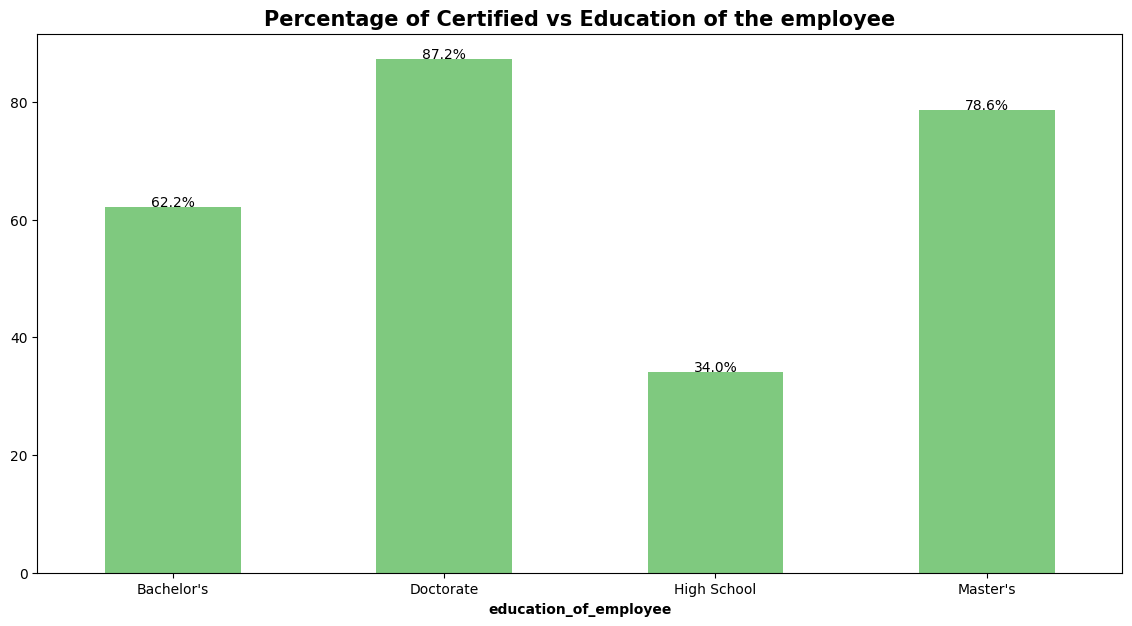

In [58]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['education_of_employee'].value_counts()/df2['education_of_employee'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs Education of the employee" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['education_of_employee'].value_counts()/df2['education_of_employee'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('education_of_employee' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()


#### Insights

<li>education status has high impact</li>
<li>Doctorate and Master's graduates have higher cange of being accepted then the others</li>

#### 4.4 Does applicant's previous work experience has any impact on Visa status ?

In [61]:
#group data by has_job_experience and count case_status
df.groupby('has_job_experience')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
has_job_experience case_status            
N                  Certified     56.134108
                   Denied        43.865892
Y                  Certified     74.476422
                   Denied        25.523578

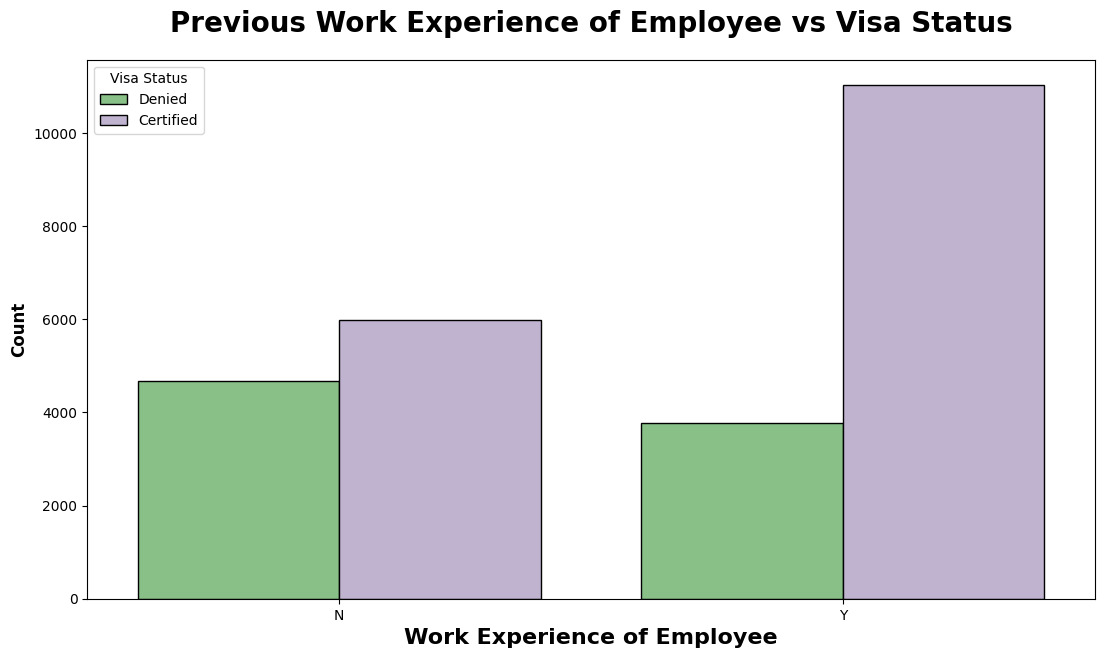

In [68]:
plt.subplots(figsize=(13,7))
sns.countplot(x="has_job_experience",hue="case_status", data=df, ec= "black", palette="Accent")
plt.title("Previous Work Experience of Employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Work Experience of Employee", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

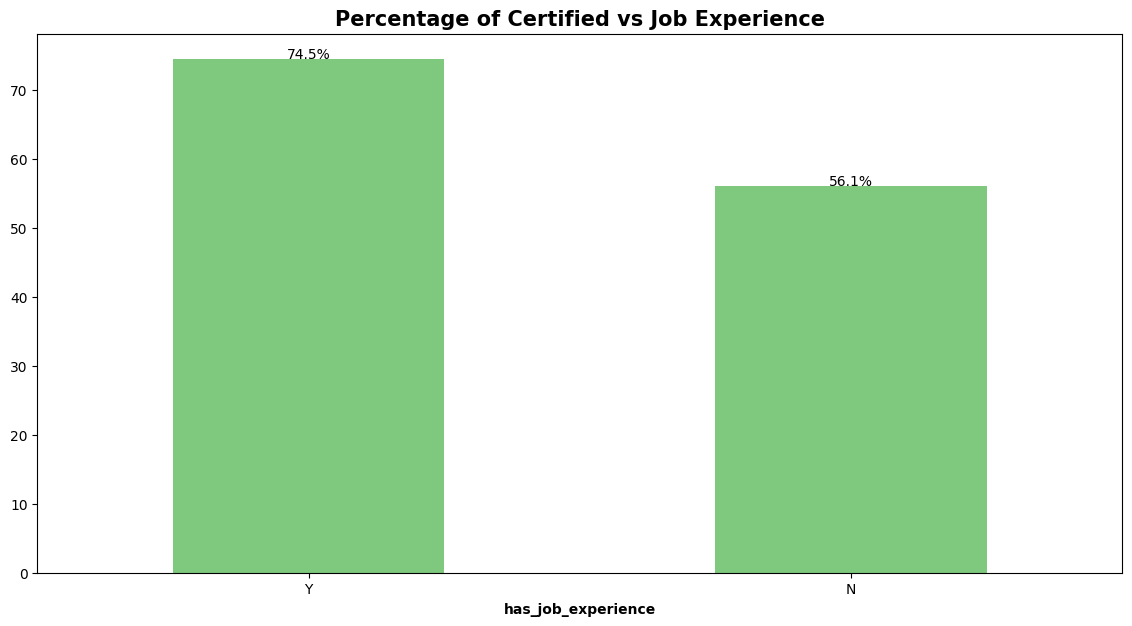

In [69]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['has_job_experience'].value_counts()/df2['has_job_experience'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs Job Experience" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['has_job_experience'].value_counts()/df2['has_job_experience'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('has_job_experience' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

#### Report

<li>People with previous work experience has been certified 74.5% only 25.5% applicant has been denied.</li>
<li>People with No previous work experience has been certified 56% and denied 43%.</li>
<li>This means work experience has effect on Visa status.</li>
<li>There is a slight edge for the people with work experiences then the fresheres as expected. But the difference is not huge.</li>

#### 4.5 If the Employee requires job training, does it make any impact on visa status?

In [83]:
#grouping the data by job training requirement and case status
df.groupby('requires_job_training')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
requires_job_training case_status            
N                     Certified     66.645949
                      Denied        33.354051
Y                     Certified     67.884941
                      Denied        32.115059

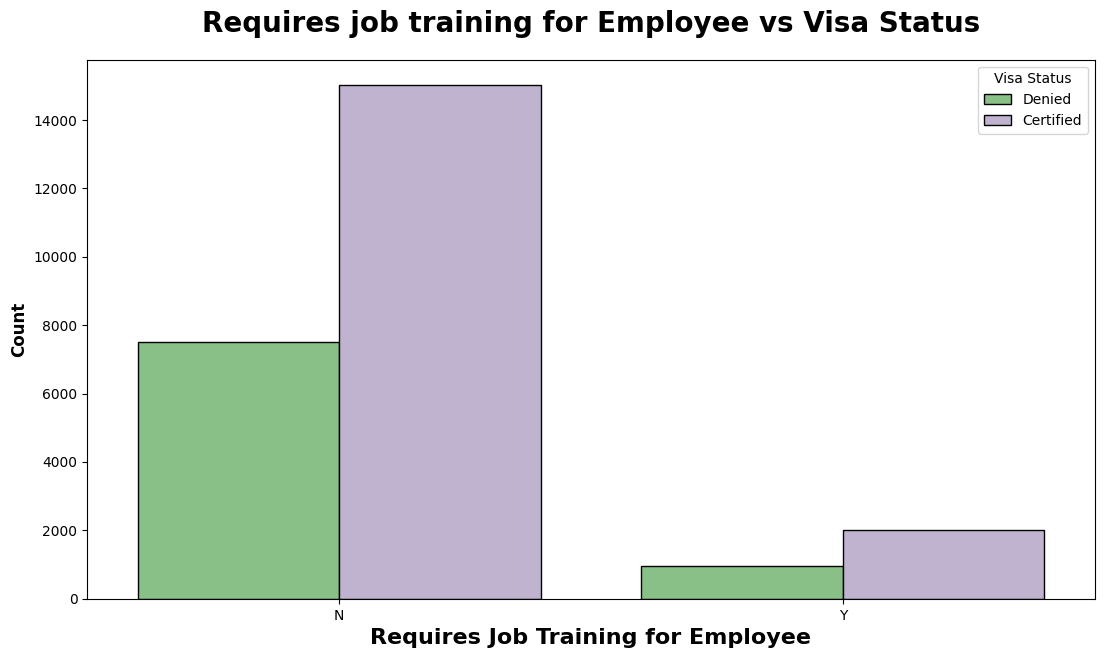

In [84]:
plt.subplots(figsize=(13,7))
sns.countplot(x="requires_job_training",hue="case_status", data=df, ec= "black",palette="Accent")
plt.title("Requires job training for Employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Requires Job Training for Employee", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

In [93]:
df['requires_job_training'].value_counts(normalize=True).to_frame()*100

,proportion
requires_job_training,
N,88.402669
Y,11.597331


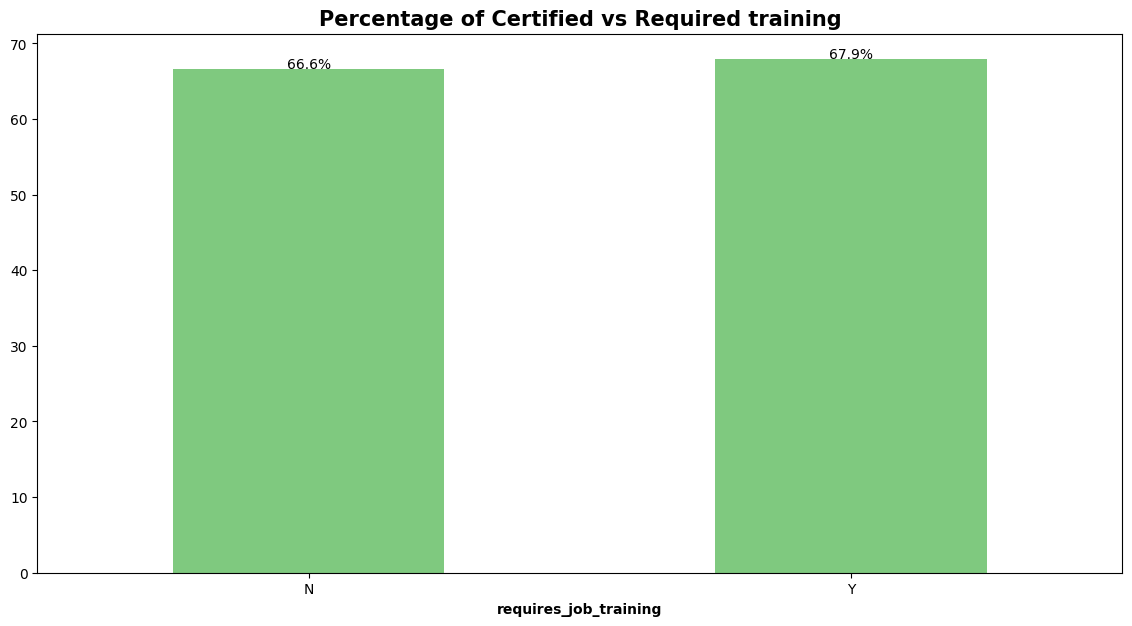

In [85]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['requires_job_training'].value_counts()/df2['requires_job_training'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs Required training" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['requires_job_training'].value_counts()/df2['requires_job_training'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('requires_job_training' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()


#### Report

<li>If employee requires job training and it doesn't have any effect on Visa status.</li>
<li>88% of applicant don't require job training.</li>
<li>63% of people who doesnt want job training got certified.</li>
<li>For employees who require job training 67% of people get certified.</li>
<li>As we checked in Chi-Squared test this feature doesn't have much impact on target variable, which is confirmed by above plot</li>

#### 4.6 Does Number of employees of employer has any impact on Visa status?

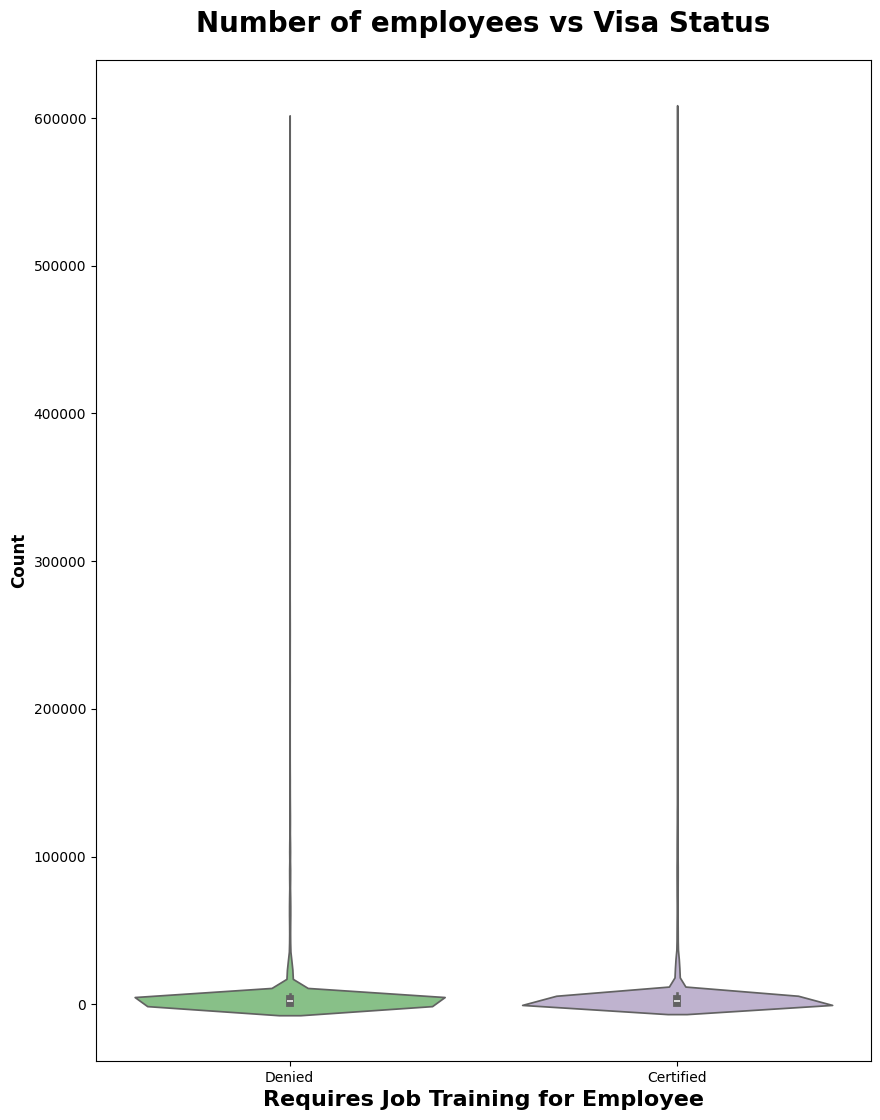

In [95]:
plt.subplots(figsize=(10,13))
sns.violinplot(x="case_status",y='no_of_employees', data=df, palette="Accent")
plt.title("Number of employees vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Requires Job Training for Employee", weight="bold", fontsize=16)
plt.ylim()
plt.show()

#### Insights

<li>The distrubution of both is similar. But there are outliers in both the classes which need to be handeled.</li>

#### 4.7 Wages and its impact on Visa status

In [98]:
#group data by unit_of_wage and count the case_status
df.groupby('unit_of_wage')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
unit_of_wage case_status            
Hour         Denied        65.368567
             Certified     34.631433
Month        Certified     61.797753
             Denied        38.202247
Week         Certified     62.132353
             Denied        37.867647
Year         Certified     69.885027
             Denied        30.114973

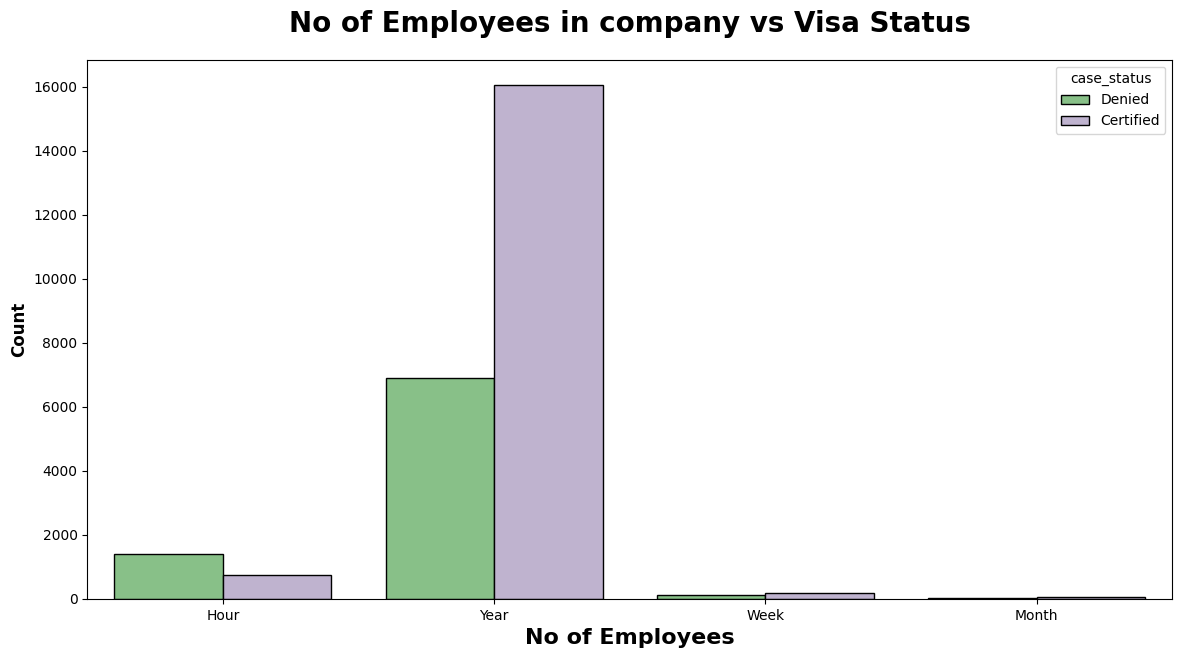

In [100]:
plt.subplots(figsize = (14,7))
sns.countplot(x= 'unit_of_wage' , hue = 'case_status' ,data = df , ec = 'black' , palette="Accent")
plt.title("No of Employees in company vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("No of Employees", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

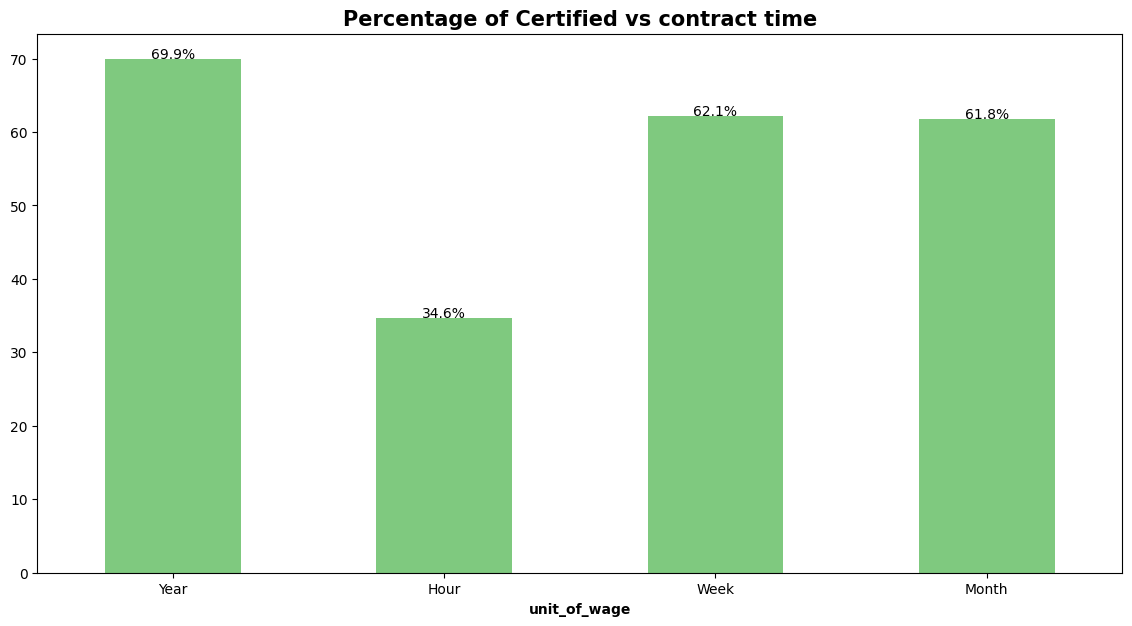

In [101]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['unit_of_wage'].value_counts()/df2['unit_of_wage'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs contract time" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['unit_of_wage'].value_counts()/df2['unit_of_wage'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('unit_of_wage' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

#### Report

<li>For employees who applied for hourly pay 65% of them were denied.</li>
<li>Yearly unit wage application were accepted for 69% and denied for 31% of the time.</li>
</li>There is a higher chance of yearly contract than other and immediately followed by week and month.</li>

#### 4.7 Does Region of employment has impact on Visa status ?

In [108]:
df.groupby('region_of_employment')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
region_of_employment case_status            
Island               Certified     60.266667
                     Denied        39.733333
Midwest              Certified     75.528210
                     Denied        24.471790
Northeast            Certified     62.904795
                     Denied        37.095205
South                Certified     70.015676
                     Denied        29.984324
West                 Certified     62.253265
                     Denied        37.746735

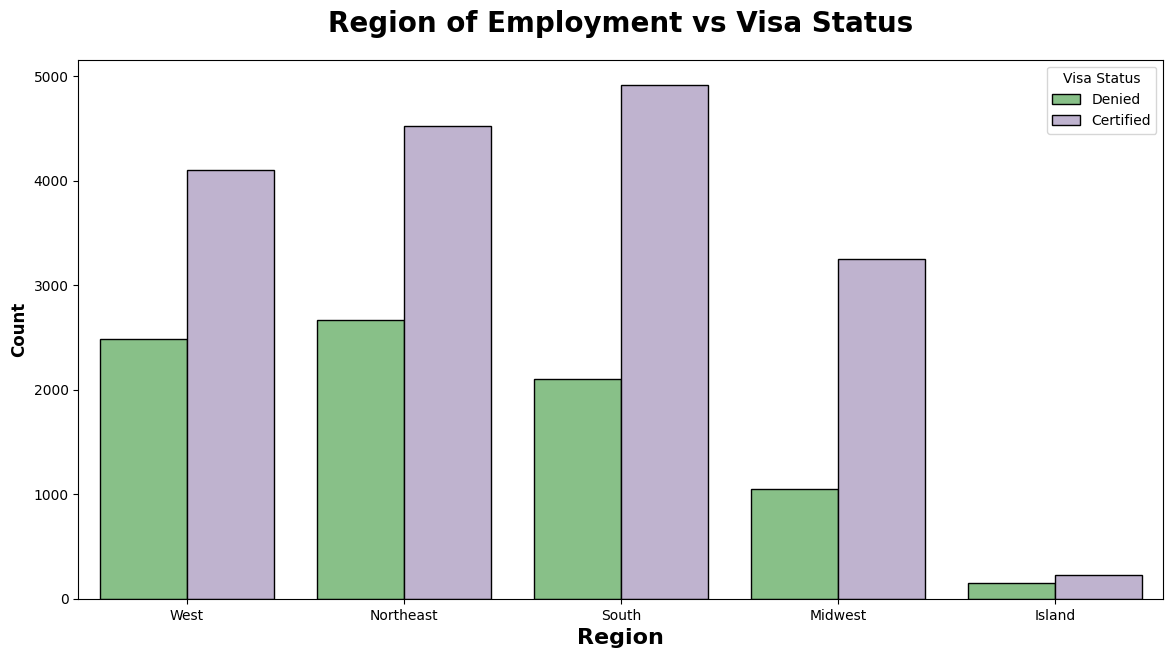

In [115]:
plt.subplots(figsize=(14,7))
sns.countplot(x="region_of_employment",hue="case_status", data=df,ec='black',palette="Accent")
plt.title("Region of Employment vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Region", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

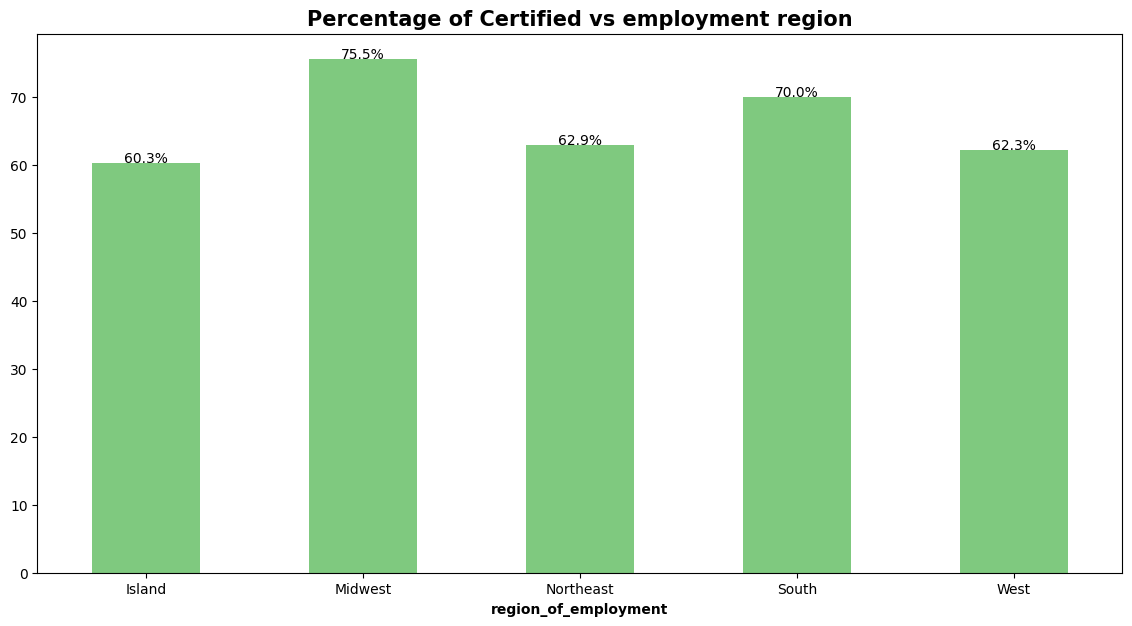

In [116]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['region_of_employment'].value_counts()/df2['region_of_employment'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs employment region" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['region_of_employment'].value_counts()/df2['region_of_employment'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('region_of_employment' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

#### Report

<li>As per chart all the region have very similar pattern of getting Visa certified and Denied.</li>
<li>There is a slight edge for midwest followed by South region</li>

In [122]:
df.groupby('prevailing_wage').case_status.value_counts()

prevailing_wage  case_status
2.1367           Certified      1
2.9561           Denied         1
3.0031           Denied         1
3.3188           Denied         1
3.4889           Certified      1
                               ..
311734.4900      Certified      1
314156.0600      Certified      1
315497.6000      Certified      1
318446.0500      Certified      1
319210.2700      Denied         1
Name: count, Length: 25462, dtype: int64

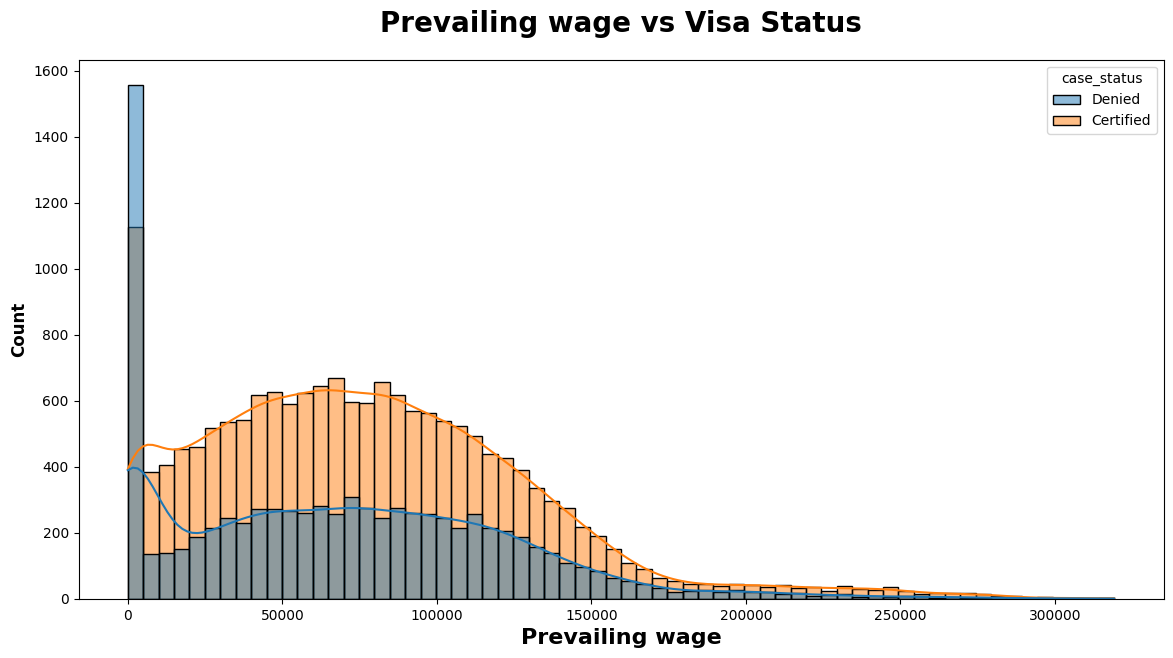

In [128]:
plt.subplots(figsize=(14,7))
sns.histplot(x="prevailing_wage",hue="case_status", data=df, kde=True , ec ='black' )
plt.title("Prevailing wage vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Prevailing wage", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

#### Insights

<li>The distribution of both the classes are same but need to handel the outliers.</li>

##### 4.8.1 Prevailing wage based on Education

In [130]:
print('Average Prevailing wage based on Employee education')
df.groupby('education_of_employee')['prevailing_wage'].mean().to_frame().sort_values(by='prevailing_wage',ascending=False)

Average Prevailing wage based on Employee education


,prevailing_wage
education_of_employee,
Master's,78843.057843
Bachelor's,73405.443735
High School,71582.147756
Doctorate,64561.076657


In [134]:
import plotly.express as px
import plotly.graph_objects as go

# Create the boxplot
fig = px.box(df, 
              x="prevailing_wage", 
              y="education_of_employee", 
              title="Prevailing Wage Distribution by Education Level",
              labels={"prevailing_wage": "Prevailing Wage ($)",
                      "education_of_employee": "Education Level"},
              height=700,
              width=1100,
              color="education_of_employee",
              color_discrete_sequence=px.colors.qualitative.Pastel)

# Update layout for better aesthetics
fig.update_layout(
    title_font=dict(size=24, family="Arial", color="#333"),
    title_x=0.5,  # Center the title
    font=dict(family="Arial"),
    xaxis_title_font=dict(size=18, color="#333"),
    yaxis_title_font=dict(size=18, color="#333"),
    xaxis_tickfont=dict(size=14),
    yaxis_tickfont=dict(size=14),
    plot_bgcolor="white",
    xaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgrey',
        zeroline=True,
        zerolinewidth=1,
        zerolinecolor='lightgrey',
    ),
    yaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgrey',
    ),
    boxmode="group",
    boxgap=0.1,
    boxgroupgap=0.2
)

# Add a subtle border to the plot
fig.update_layout(
    shapes=[go.layout.Shape(
        type="rect",
        xref="paper",
        yref="paper",
        x0=0,
        y0=0,
        x1=1,
        y1=1,
        line=dict(color="lightgrey", width=2),
    )]
)

# Show the plot
fig.show()

#### Report

<li>Based on the above table and charts its seen that applicant with Master's education has higher average prevailing wages.</li>
<li>Master's education applicants have median salary of $75.07k, which approximately 20% higher than Doctrate's average wage, which is strange.</li>

In [136]:
df.groupby('education_of_employee')['prevailing_wage'].median().to_frame()

,prevailing_wage
education_of_employee,
Bachelor's,69825.710
Doctorate,57543.625
High School,66204.710
Master's,75020.590


##### 4.8.2 Prevailing wage based on Job experience

In [137]:
print('Median Prevailing wage based on Job experience')
df.groupby('has_job_experience')['prevailing_wage'].median().to_frame().sort_values(by='prevailing_wage',ascending=False)

Median Prevailing wage based on Job experience


,prevailing_wage
has_job_experience,
N,72602.290
Y,69033.665


#### Report

<li>Suprisingly people who has less job experience has more prevailing wage.</li>
<li>No job experience applicant has median prevailing wage as 72k USD.</li>
<li>Previous job experience applicant has median prevailing wage as 69K USD.</li>

##### 4.8.3 Prevailing wage based on Continent

In [142]:
print("let's see median wages according to continent")
df.groupby(['continent','has_job_experience'])['prevailing_wage'].median().to_frame()

let's see median wages according to continent


prevailing_wage
continent     has_job_experience                 
Africa        N                          73328.34
              Y                          76627.91
Asia          N                          79217.68
              Y                          74009.09
Europe        N                          52856.59
              Y                          51507.05
North America N                          64548.22
              Y                          64181.76
Oceania       N                          65478.98
              Y                          73542.33
South America N                          56012.16
              Y                          51517.11

In [144]:
import plotly.express as px
import plotly.graph_objects as go

# Create the boxplot
fig = px.box(df, 
              x="prevailing_wage", 
              y="continent", 
              title="Prevailing Wage Distribution by continent",
              labels={"prevailing_wage": "Prevailing Wage ($)",
                      "continent": "continent"},
              height=700,
              width=1100,
              color="continent",
              color_discrete_sequence=px.colors.qualitative.Pastel)

# Update layout for better aesthetics
fig.update_layout(
    title_font=dict(size=24, family="Arial", color="#333"),
    title_x=0.5,  # Center the title
    font=dict(family="Arial"),
    xaxis_title_font=dict(size=18, color="#333"),
    yaxis_title_font=dict(size=18, color="#333"),
    xaxis_tickfont=dict(size=14),
    yaxis_tickfont=dict(size=14),
    plot_bgcolor="white",
    xaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgrey',
        zeroline=True,
        zerolinewidth=1,
        zerolinecolor='lightgrey',
    ),
    yaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgrey',
    ),
    boxmode="group",
    boxgap=0.1,
    boxgroupgap=0.2
)

# Add a subtle border to the plot
fig.update_layout(
    shapes=[go.layout.Shape(
        type="rect",
        xref="paper",
        yref="paper",
        x0=0,
        y0=0,
        x1=1,
        y1=1,
        line=dict(color="lightgrey", width=2),
    )]
)

# Show the plot
fig.show()

#### 4.9 Year of establishment

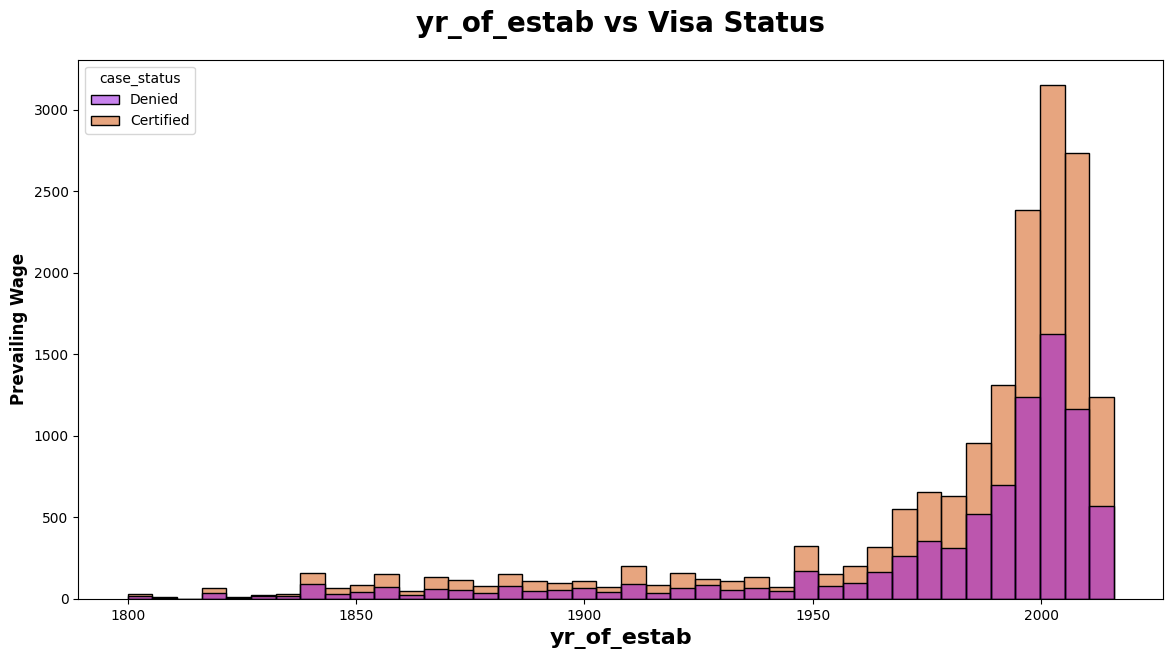

In [145]:
plt.subplots(figsize=(14,7))
sns.histplot(x = "yr_of_estab", data=df,palette='gnuplot', bins=40, hue='case_status')
plt.title("yr_of_estab vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("yr_of_estab", weight="bold", fontsize=16)
plt.ylabel("Prevailing Wage", weight="bold", fontsize=12)
plt.show()

#### Report

<li>Each bins consists of 5 years.</li>
<li>Many companies were established after year 2000.</li>
<li>The most company establishment happened in year 2000-2005</li>

### Final Report
<li>case_id column can be dropped as it is an ID.</li>
<li>requires_job_training column can be dropped as it doesn't have much impact on target variable, Proved in visualization and chi2 test.</li>
<li>no_of_employees, prevailing_wage columns have outllier which should be handled.</li>
<li>continent columns has few unique values with very less count, which can be made as others</li>
<li>Target column case_status is imbalanced can be handled before model building.</li>